In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../pp_1st')
sys.path.append('../pp_2nd')
sys.path.append('../pp_3rd')
import pp1st_pipeline
import pp1st_func
import pp2nd_func
import pp3_func
import pp6_func
from sklearn.experimental import enable_iterative_imputer 
from sklearn_pandas import CategoricalImputer
from sklearn_pandas import CategoricalImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from tqdm import tqdm
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
import importlib
importlib.reload(pp3_func)

<module 'pp3_func' from '../pp_3rd/pp3_func.py'>

In [2]:
data = pd.read_csv('../raw/PJT002_train.csv', )
data_val = pd.read_csv('../raw/PJT002_validation.csv' )
data_test = pd.read_csv('../raw/PJT002_test.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = pp6_func.weather_mean(data)
data_val = pp6_func.weather_mean(data_val)
data_test = pp6_func.weather_mean(data_test)
data = pp2nd_func.replace(data)
data = pp2nd_func.label_encoding(data)
data_val = pp2nd_func.replace(data_val)
data_val = pp2nd_func.label_encoding(data_val)
data_test = pp2nd_func.replace(data_test)
data_test = pp2nd_func.label_encoding(data_test)

../pp_2nd/pp2nd_func.py:40: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  data.loc[data['season']==0, 'season_mean_differ'] = data[data['season']==0]['tmprtr'].apply(lambda x : x - 13.893263003271683).get_values()
../pp_2nd/pp2nd_func.py:41: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  data.loc[data['season']==1, 'season_mean_differ'] = data[data['season']==1]['tmprtr'].apply(lambda x : x - 24.737439966590106).get_values()
../pp_2nd/pp2nd_func.py:42: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  data.loc[data['season']==2, 'season_mean_differ'] = data[data['season']==2]['tmprtr'].apply(lambda x : x - 15.416313269493845).get_values()
../pp_2nd/pp2nd_func.py:43: FutureWarning: The 'get_values' method is deprecated and will b

- ENERGY

In [4]:
data = pp6_func.energy_mean(data)
data_val = pp6_func.energy_mean(data_val)
data_test = pp6_func.energy_mean(data_test)

In [5]:
elemean_train = data.drop(index = data['ele_mean'].sort_values(ascending=False).iloc[:100].keys())

In [6]:
ele_mean_imputer = lgbm.LGBMRegressor(boosting_type='dart')
ele_mean_imputer.fit(np.asarray(elemean_train[(elemean_train['ele_mean'].notna()) & (elemean_train['ele_mean']!=0)][['fr_mn_cnt',
                                                                                                                     'fr_sttn_dstnc','jmk_공', 'jmk_과', 'jmk_구', 
                                  'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
                                  'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
                                  'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
                                  'jmk_철', 'jmk_체', 'jmk_학']]), 
                     elemean_train[(elemean_train['ele_mean'].notna()) & (elemean_train['ele_mean']!=0)]['ele_mean'])

# ele_mean_imputer_res = ele_mean_imputer.predict(np.asarray(elemean_train[(elemean_train['ele_mean'].notna()) & (elemean_train['ele_mean']!=0)][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
#        'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
#        'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
#        'jmk_철', 'jmk_체', 'jmk_학']]))
# res_df = pd.DataFrame({'pred' : ele_mean_imputer_res, 'true' : elemean_train[(elemean_train['ele_mean'].notna()) & (elemean_train['ele_mean']!=0)]['ele_mean']})
# print('mse : ' ,np.sqrt(np.mean(np.square((res_df['pred'] - res_df['true'])))))
# print('minus 갯수 : ',sum(ele_mean_imputer_res <0))

null_idx = data[(data['ele_mean'].isna())].index
ele_mean_imputer_res = ele_mean_imputer.predict(np.asarray(data[(data['ele_mean'].isna())][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
       'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
       'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
       'jmk_철', 'jmk_체', 'jmk_학']]))
data.loc[null_idx, 'ele_mean'] = ele_mean_imputer_res
data.loc[data['ele_mean'] <0, 'ele_mean'] = -data[data['ele_mean'] <0]['ele_mean']

In [7]:
data_val['jmk_양']=0; data_test['jmk_사'] = 0; data_test['jmk_유'] = 0; data_test['jmk_양'] = 0

In [8]:
null_idx = data_val[(data_val['ele_mean'].isna())].index
ele_mean_imputer_res = ele_mean_imputer.predict(np.asarray(data_val[(data_val['ele_mean'].isna())][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
       'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
       'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
       'jmk_철', 'jmk_체', 'jmk_학']]))
data_val.loc[null_idx, 'ele_mean'] = ele_mean_imputer_res
data_val.loc[data_val['ele_mean'] <0, 'ele_mean'] = -data_val[data_val['ele_mean'] <0]['ele_mean']

null_idx = data_test[(data_test['ele_mean'].isna())].index
ele_mean_imputer_res = ele_mean_imputer.predict(np.asarray(data_test[(data_test['ele_mean'].isna())][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
       'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
       'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
       'jmk_철', 'jmk_체', 'jmk_학']]))
data_test.loc[null_idx, 'ele_mean'] = ele_mean_imputer_res
data_test.loc[data_test['ele_mean'] <0, 'ele_mean'] = -data_test[data_test['ele_mean'] <0]['ele_mean']

In [9]:
gasmean_train = data.drop(index = data['gas_mean'].sort_values(ascending=False).iloc[:100].keys())

In [10]:
#GAS
gas_mean_imputer = lgbm.LGBMRegressor(boosting_type='dart')
gas_mean_imputer.fit(np.asarray(gasmean_train[(gasmean_train['gas_mean'].notna()) & (gasmean_train['gas_mean']!=0)]
                                [['fr_mn_cnt','fr_sttn_dstnc','jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
                                  'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
                                  'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
                                  'jmk_철', 'jmk_체', 'jmk_학']]), 
                     gasmean_train[(gasmean_train['gas_mean'].notna()) & (gasmean_train['gas_mean']!=0)]['gas_mean'])

# ele_mean_imputer_res = ele_mean_imputer.predict(np.asarray(elemean_train[(elemean_train['ele_mean'].notna()) & (elemean_train['ele_mean']!=0)][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
#        'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
#        'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
#        'jmk_철', 'jmk_체', 'jmk_학']]))
# res_df = pd.DataFrame({'pred' : ele_mean_imputer_res, 'true' : elemean_train[(elemean_train['ele_mean'].notna()) & (elemean_train['ele_mean']!=0)]['ele_mean']})
# print('mse : ' ,np.sqrt(np.mean(np.square((res_df['pred'] - res_df['true'])))))
# print('minus 갯수 : ',sum(ele_mean_imputer_res <0))

null_idx = data[(data['gas_mean'].isna())].index
gas_mean_imputer_res = gas_mean_imputer.predict(np.asarray(data[(data['gas_mean'].isna())][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
       'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
       'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
       'jmk_철', 'jmk_체', 'jmk_학']]))
data.loc[null_idx, 'gas_mean'] = gas_mean_imputer_res
data.loc[data['gas_mean'] <0, 'gas_mean'] = -data[data['gas_mean'] <0]['gas_mean']

In [11]:
null_idx = data_val[(data_val['gas_mean'].isna())].index
gas_mean_imputer_res = gas_mean_imputer.predict(np.asarray(data_val[(data_val['gas_mean'].isna())][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
       'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
       'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
       'jmk_철', 'jmk_체', 'jmk_학']]))
data_val.loc[null_idx, 'gas_mean'] = gas_mean_imputer_res
data_val.loc[data_val['gas_mean'] <0, 'gas_mean'] = -data_val[data_val['gas_mean'] <0]['gas_mean']

null_idx = data_test[(data_test['gas_mean'].isna())].index
gas_mean_imputer_res = gas_mean_imputer.predict(np.asarray(data_test[(data_test['gas_mean'].isna())][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
       'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
       'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
       'jmk_철', 'jmk_체', 'jmk_학']]))
data_test.loc[null_idx, 'gas_mean'] = gas_mean_imputer_res
data_test.loc[data_test['gas_mean'] <0, 'gas_mean'] = -data_test[data_test['gas_mean'] <0]['gas_mean']

- HUMAN COUNT

In [12]:
hmcnt_train = data.drop(index = data['hm_cnt'].sort_values(ascending=False).iloc[:800].keys())

In [13]:
hm_cnt_imputer = lgbm.LGBMRegressor(boosting_type='gbdt')
hm_cnt_imputer.fit(np.asarray(hmcnt_train[(hmcnt_train['hm_cnt'].notna()) & (hmcnt_train['hm_cnt']!=0)]
                                [['fr_mn_cnt','fr_sttn_dstnc',
                                  'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
                                  'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
                                  'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
                                  'jmk_철', 'jmk_체', 'jmk_학'
                                 ]]), 
                     hmcnt_train[(hmcnt_train['hm_cnt'].notna()) & (hmcnt_train['hm_cnt']!=0)]['hm_cnt'])

null_idx = data[(data['hm_cnt'].isna())].index
hm_cnt_imputer_res = hm_cnt_imputer.predict(np.asarray(data[(data['hm_cnt'].isna()) ][['fr_mn_cnt','fr_sttn_dstnc',
                                  'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
                                  'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
                                  'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
                                  'jmk_철', 'jmk_체', 'jmk_학'
                                 ]]))
# res_df = pd.DataFrame({'pred' : hm_cnt_imputer_res, 'true' : hmcnt_train[(hmcnt_train['hm_cnt'].notna()) & (hmcnt_train['hm_cnt']!=0)]['hm_cnt']})
# print('mse : ' ,np.sqrt(np.mean(np.square((res_df['pred'] - res_df['true'])))))
# print('minus 갯수 : ',sum(ele_mean_imputer_res <0))
data.loc[null_idx, 'hm_cnt'] = hm_cnt_imputer_res
data.loc[data['hm_cnt'] <0, 'hm_cnt'] = -data[data['hm_cnt'] <0]['hm_cnt']

In [14]:
null_idx = data_val[(data_val['hm_cnt'].isna())].index
hm_cnt_imputer_res = hm_cnt_imputer.predict(np.asarray(data_val[(data_val['hm_cnt'].isna())][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
       'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
       'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
       'jmk_철', 'jmk_체', 'jmk_학']]))
data_val.loc[null_idx, 'hm_cnt'] = hm_cnt_imputer_res
data_val.loc[data_val['hm_cnt'] <0, 'hm_cnt'] = -data_val[data_val['hm_cnt'] <0]['hm_cnt']

# null_idx = data_test[(data_test['hm_cnt'].isna())].index
# hm_cnt_imputer_res = hm_cnt_imputer.predict(np.asarray(data_test[(data_test['hm_cnt'].isna())][['fr_mn_cnt','fr_sttn_dstnc', 'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목',
#        'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유', 'jmk_임', 'jmk_잡',
#        'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천',
#        'jmk_철', 'jmk_체', 'jmk_학']]))
# data_test.loc[null_idx, 'hm_cnt'] = hm_cnt_imputer_res
# data_test.loc[data_test['hm_cnt'] <0, 'hm_cnt'] = -data_test[data_test['hm_cnt'] <0]['hm_cnt']

In [15]:
data = pp3_func.Hm_cnt(data)
data_val = pp3_func.Hm_cnt(data_val)
data_test = pp3_func.Hm_cnt(data_test)

In [16]:
data = pp3_func.date_author_pre(data, train=True)
data_val = pp3_func.date_author_pre(data_val, train=False)
data_test = pp3_func.date_author_pre(data_test, train=False)
data['dt_of_athrztn_rflct_log'] =  np.log(2020 - data['dt_of_athrztn'])
data_val['dt_of_athrztn_rflct_log'] =  np.log(2020 - data_val['dt_of_athrztn'])
data_test['dt_of_athrztn_rflct_log'] =  np.log(2020 - data_test['dt_of_athrztn'])

- WEATHER

In [17]:
data = pp2nd_func.wnd_drctn_enc(data)
data_val = pp2nd_func.wnd_drctn_enc(data_val)
data_test = pp2nd_func.wnd_drctn_enc(data_test)
data = pp3_func.Wnd_spd_log(data)
data_val = pp3_func.Wnd_spd_log(data_val)
data_test = pp3_func.Wnd_spd_log(data_test)

In [28]:
data_val[['season','season_mean_differ','hmdt','wnd_drctn_enc','wnd_spd_log','tmprtr','wnd_drctn']].isnull().sum()

season                  0
season_mean_differ      0
hmdt                    0
wnd_drctn_enc           0
wnd_spd_log             0
tmprtr                  0
wnd_drctn             573
dtype: int64

In [18]:
wnd_drctn_enc_imputer = CategoricalImputer()
data['wnd_drctn_enc'] = wnd_drctn_enc_imputer.fit_transform(data['wnd_drctn_enc'])
data_val['wnd_drctn_enc'] = wnd_drctn_enc_imputer.transform(data_val['wnd_drctn_enc'])
data_test['wnd_drctn_enc'] = wnd_drctn_enc_imputer.transform(data_test['wnd_drctn_enc'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [19]:
wind_spd_train = data.dropna(subset=['wnd_spd'])
wind_spd_imputer = lgbm.LGBMRegressor(boosting_type='gbdt')
wind_spd_imputer.fit(np.asarray(wind_spd_train[['season_mean_differ','tmprtr']]), 
                     wind_spd_train['wnd_spd'])
# wind_spd_res = wind_spd_imputer.predict(np.asarray(wind_spd_train[['season_mean_differ','tmprtr']])) 
# res_df = pd.DataFrame({'pred' : wind_spd_res, 'true' :wind_spd_train['wnd_spd']})
# print('mse : ' ,np.sqrt(np.mean(np.square((res_df['pred'] - res_df['true'])))))
# print('mean : ' ,wind_spd_train['wnd_spd'].mean())
# res_df
wind_spd_res = wind_spd_imputer.predict(np.asarray(data[data['wnd_spd'].isna()][['season_mean_differ','tmprtr']])) 
data.loc[data['wnd_spd'].isna(),'wnd_spd'] = wind_spd_res

In [20]:
wind_spd_res = wind_spd_imputer.predict(np.asarray(data_val[data_val['wnd_spd'].isna()][['season_mean_differ','tmprtr']])) 
data_val.loc[data_val['wnd_spd'].isna(),'wnd_spd'] = wind_spd_res

wind_spd_res = wind_spd_imputer.predict(np.asarray(data_test[data_test['wnd_spd'].isna()][['season_mean_differ','tmprtr']])) 
data_test.loc[data_test['wnd_spd'].isna(),'wnd_spd'] = wind_spd_res

- JMK,FR_MN_CNT, RGNL_AR_NM

In [23]:
data = pp3_func.Jmk_enc(data)
data_val = pp3_func.Jmk_enc(data_val)
data_test = pp3_func.Jmk_enc(data_test)

data = pp3_func.Fr_mn_cnt(data)
data_val = pp3_func.Fr_mn_cnt(data_val)
data_test = pp3_func.Fr_mn_cnt(data_test)

data = pp3_func.regional_name_pre(data)
data_val = pp3_func.regional_name_pre(data_val)
data_test = pp3_func.regional_name_pre(data_test)

 - BUILDING PRICE

In [28]:
data['bldng_ar_prc_log'] = np.log(data['bldng_ar_prc'])
data_val['bldng_ar_prc_log'] = np.log(data_val['bldng_ar_prc'])
data_test['bldng_ar_prc_log'] = np.log(data_test['bldng_ar_prc'])

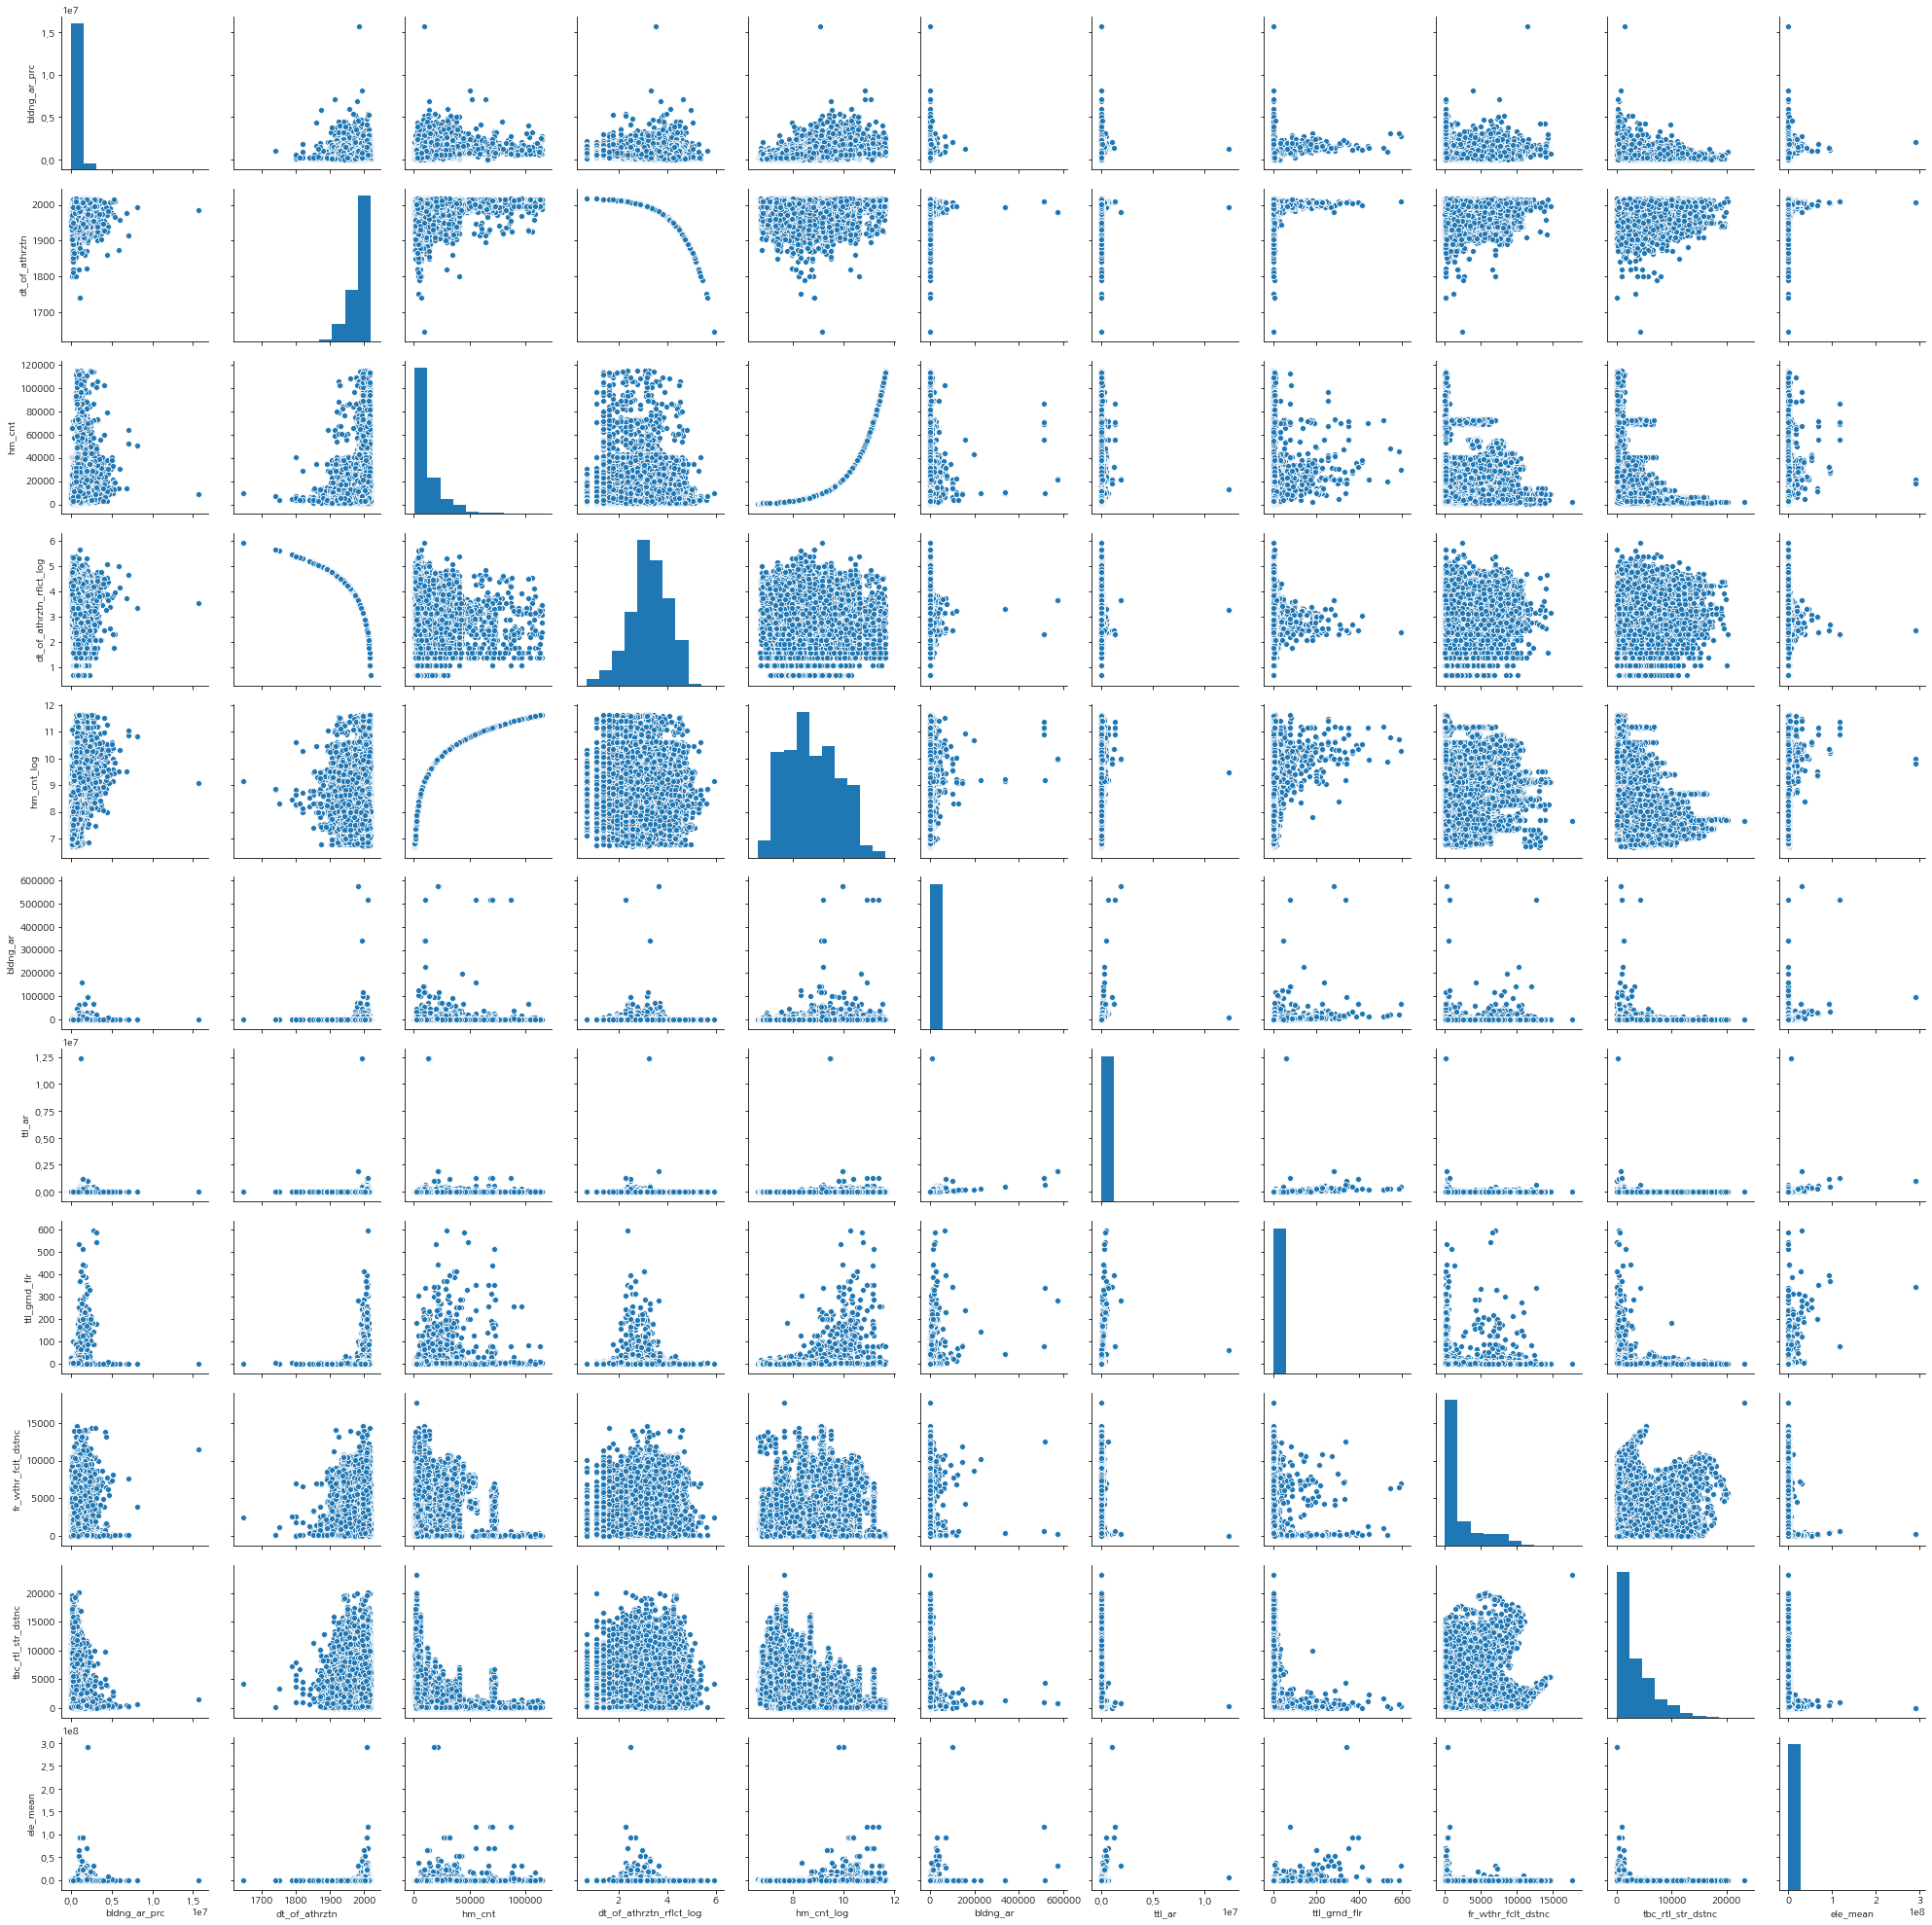

In [35]:
# sns.pairplot(data[['bldng_ar_prc','dt_of_athrztn','hm_cnt','dt_of_athrztn_rflct_log','hm_cnt_log','bldng_ar','ttl_ar','ttl_grnd_flr','fr_wthr_fclt_dstnc','tbc_rtl_str_dstnc','ele_mean']])

In [29]:
data = data.join( pd.get_dummies(data['jmk_enc'],prefix='jmk_enc'))
data_val = data_val.join( pd.get_dummies(data_val['jmk_enc'],prefix='jmk_enc'))
data_test = data_test.join( pd.get_dummies(data_test['jmk_enc'],prefix='jmk_enc'))

In [30]:
bldng_prc_train = data.dropna(subset=['bldng_ar_prc','dt_of_athrztn','bldng_ar','ttl_ar','ttl_grnd_flr'])
bldng_prc_train.shape

(19961, 230)

In [31]:
jmk_col = list(data.columns[data.columns.str.contains('jmk')])
jmk_col.remove('jmk'); jmk_col.remove('jmk_enc')

In [32]:
prc_col = ['bldng_ar_prc','dt_of_athrztn','hm_cnt','dt_of_athrztn_rflct_log','hm_cnt_log','bldng_ar','ttl_ar','ttl_grnd_flr','fr_wthr_fclt_dstnc','tbc_rtl_str_dstnc','ele_mean']
prc_col.extend(jmk_col)

In [33]:
bldng_prc_imputer = lgbm.LGBMRegressor(boosting_type='gbdt')
bldng_prc_imputer.fit(np.asarray(bldng_prc_train[prc_col].drop(columns='bldng_ar_prc')), 
                     bldng_prc_train['bldng_ar_prc'])
# bldng_prc_res = bldng_prc_imputer.predict(np.asarray(bldng_prc_train[prc_col].drop(columns='bldng_ar_prc'))) 
# res_df = pd.DataFrame({'pred' : bldng_prc_res, 'true' :bldng_prc_train['bldng_ar_prc']})
# print('mse : ' ,np.sqrt(np.mean(np.square((res_df['pred'] - res_df['true'])))))
# print('mean : ' ,data['bldng_ar_prc'].mean())
# res_df
bldng_prc_res  = bldng_prc_imputer.predict(np.asarray(data[data['bldng_ar_prc'].isna()][prc_col].drop(columns = 'bldng_ar_prc'))) 
data.loc[data['bldng_ar_prc'].isna(),'bldng_ar_prc'] = bldng_prc_res

In [34]:
data.loc[data['bldng_ar_prc'] <0, 'bldng_ar_prc'] = -data[data['bldng_ar_prc'] <0]['bldng_ar_prc']

In [35]:
bldng_prc_res  = bldng_prc_imputer.predict(np.asarray(data_val[data_val['bldng_ar_prc'].isna()][prc_col].drop(columns = 'bldng_ar_prc'))) 
data_val.loc[data_val['bldng_ar_prc'].isna(),'bldng_ar_prc'] = bldng_prc_res

bldng_prc_res  = bldng_prc_imputer.predict(np.asarray(data_test[data_test['bldng_ar_prc'].isna()][prc_col].drop(columns = 'bldng_ar_prc'))) 
data_test.loc[data_test['bldng_ar_prc'].isna(),'bldng_ar_prc'] = bldng_prc_res

In [36]:
data_val.loc[data_val['bldng_ar_prc'] <0, 'bldng_ar_prc'] = -data_val[data_val['bldng_ar_prc'] <0]['bldng_ar_prc']
data_test.loc[data_test['bldng_ar_prc'] <0, 'bldng_ar_prc'] = -data_test[data_test['bldng_ar_prc'] <0]['bldng_ar_prc']

- RGNL AR NM

In [39]:
rgnl_train = data.dropna(subset=prc_col) ; rgnl_train = rgnl_train.dropna(subset = ['rgnl_ar_nm_enc'])
rgnl_train.shape

(28424, 230)

In [40]:
rgnl_imputer = lgbm.LGBMClassifier(boosting_type='gbdt')
rgnl_imputer.fit(np.asarray(rgnl_train[prc_col]), 
                     rgnl_train['rgnl_ar_nm_enc'])
# rgnl_imputer_res = rgnl_imputer.predict(np.asarray(rgnl_train[prc_col])) 
# res_df = pd.DataFrame({'pred' : rgnl_imputer_res, 'true' :rgnl_train['rgnl_ar_nm_enc']})
# print('acc : ',sum(np.equal(res_df['pred'], res_df['true'])) / res_df.shape[0])
rgnl_imputer_res  = rgnl_imputer.predict(np.asarray(data[data['rgnl_ar_nm_enc'].isna()][prc_col])) 
data.loc[data['rgnl_ar_nm_enc'].isna(),'rgnl_ar_nm_enc'] = rgnl_imputer_res

In [41]:
rgnl_imputer_res  = rgnl_imputer.predict(np.asarray(data_val[data_val['rgnl_ar_nm_enc'].isna()][prc_col])) 
data_val.loc[data_val['rgnl_ar_nm_enc'].isna(),'rgnl_ar_nm_enc'] = rgnl_imputer_res

rgnl_imputer_res  = rgnl_imputer.predict(np.asarray(data_test[data_test['rgnl_ar_nm_enc'].isna()][prc_col])) 
data_test.loc[data_test['rgnl_ar_nm_enc'].isna(),'rgnl_ar_nm_enc'] = rgnl_imputer_res

 - DATE OF AUTHORIZATION

In [42]:
data.reset_index(drop=True, inplace=True)
data_val.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [43]:
data = data.join( pd.get_dummies(data['rgnl_ar_nm_enc'],prefix='rgnl_ar_nm_enc'))
data_val = data_val.join( pd.get_dummies(data_val['rgnl_ar_nm_enc'],prefix='rgnl_ar_nm_enc'))
data_test = data_test.join( pd.get_dummies(data_test['rgnl_ar_nm_enc'],prefix='rgnl_ar_nm_enc'))

In [44]:
data.drop(columns = ['rgnl_ar_nm', 'rgnl_ar_nm2','rgnl_ar_nm_enc'], inplace=True)
rgnl_col = data.columns[data.columns.str.contains('rgnl')]
prc_col.extend(rgnl_col); 
prc_col.remove('dt_of_athrztn'); prc_col.remove('dt_of_athrztn_rflct_log');

In [45]:
athr_train = data.dropna(subset=prc_col);athr_train = athr_train.dropna(subset = ['dt_of_athrztn_enc'])
athr_train = athr_train.drop(index = athr_train[athr_train['dt_of_athrztn']<1950].index)
athr_train.shape

(24710, 233)

In [46]:
athr_imputer = lgbm.LGBMClassifier(boosting_type='gbdt')# 회귀모델로 연도를 예측한뒤 인코딩을해서 확인했으나더 낮았음 -> 분류모델이 나음
athr_imputer.fit(np.asarray(athr_train[prc_col]), 
                     athr_train['dt_of_athrztn_enc'])
# athr_imputer_res = athr_imputer.predict(np.asarray(athr_train[prc_col])) 
# res_df = pd.DataFrame({'pred' : athr_imputer_res, 'true' : athr_train['dt_of_athrztn_enc']})
# print('acc : ',sum(np.equal(res_df['pred'], res_df['true'])) / res_df.shape[0])
athr_imputer_res = athr_imputer.predict(np.asarray(data[data['dt_of_athrztn_enc'].isna()][prc_col])) 
data.loc[data['dt_of_athrztn_enc'].isna(), 'dt_of_athrztn_enc'] = athr_imputer_res

In [47]:
athr_imputer_res = athr_imputer.predict(np.asarray(data_val[data_val['dt_of_athrztn_enc'].isna()][prc_col])) 
data_val.loc[data_val['dt_of_athrztn_enc'].isna(), 'dt_of_athrztn_enc'] = athr_imputer_res

athr_imputer_res = athr_imputer.predict(np.asarray(data_test[data_test['dt_of_athrztn_enc'].isna()][prc_col])) 
data_test.loc[data_test['dt_of_athrztn_enc'].isna(), 'dt_of_athrztn_enc'] = athr_imputer_res

In [48]:
data.drop(columns = 'dt_of_athrztn', inplace=True); data_val.drop(columns = 'dt_of_athrztn', inplace=True); data_test.drop(columns = 'dt_of_athrztn', inplace=True)

- AREA (x)

In [49]:
data = data.join( pd.get_dummies(data['dt_of_athrztn_enc'],prefix='dt_of_athrztn_enc_'))
data_val = data_val.join( pd.get_dummies(data_val['dt_of_athrztn_enc'],prefix='dt_of_athrztn_enc_'))
data_test = data_test.join( pd.get_dummies(data_test['dt_of_athrztn_enc'],prefix='dt_of_athrztn_enc_'))
athr_col = data.columns[data.columns.str.contains('dt_of_athrztn_enc__')]

In [50]:
prc_col.extend(athr_col); prc_col.append('ttl_dwn_flr');

In [51]:
data.reset_index(drop=True, inplace=True)
data_val.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [52]:
prc_col.remove('ttl_ar') ; prc_col.remove('bldng_ar');

In [54]:
area_train = data.dropna(subset=prc_col); athr_train = athr_train.dropna(subset = ['lnd_ar']) ; 
area_train = area_train.dropna(subset = ['bldng_ar']);area_train = area_train.dropna(subset = ['ttl_ar']);
# area_train = athr_train.drop(index = athr_train[athr_train['dt_of_athrztn']<1950].index)
# area_train.shape

In [55]:
area_train = area_train.drop(index = area_train[area_train['bldng_ar']<1950].index)

In [56]:
upper_limit = area_train['bldng_ar'].sort_values(ascending=False).unique()[5]
area_train = area_train.drop(index = area_train[area_train['bldng_ar'] >= upper_limit].index) # boxplot 보고 짜름

In [230]:
area_imputer = lgbm.LGBMRegressor(boosting_type='gbdt')
area_imputer.fit(np.asarray(area_train[prc_col]), 
                     area_train['bldng_ar'])
area_res = area_imputer.predict(np.asarray(area_train[prc_col])) 
res_df = pd.DataFrame({'pred' : area_res, 'true' :area_train['bldng_ar_prc']})
print('mse : ' ,np.sqrt(np.mean(np.square((res_df['pred'] - res_df['true'])))))
print('mean : ' ,data['bldng_ar_prc'].mean())
res_df
# bldng_prc_res  = bldng_prc_imputer.predict(np.asarray(data[data['bldng_ar_prc'].isna()][prc_col].drop(columns = 'bldng_ar_prc'))) 
# data.loc[data['bldng_ar_prc'].isna(),'bldng_ar_prc'] = bldng_prc_res

mse :  941489.5232980886
mean :  642716.222171321


,pred,true
126,3555.746975,5.438683e+05
128,2645.071620,3.305327e+05
206,8273.038056,6.267825e+05
241,11683.692878,3.776937e+05
251,6198.800639,4.081387e+05
267,6199.411481,3.678109e+05
351,3249.404397,5.791640e+05
357,3772.857230,9.644496e+05
369,2883.422741,7.156610e+05
373,2883.422741,7.156610e+05


In [57]:
data.loc[data['bldng_ar'].isnull(), 'bldng_ar'] = data['bldng_ar'].mean()
data.loc[data['ttl_ar'].isnull(), 'ttl_ar'] = data['ttl_ar'].mean()
data.loc[data['lnd_ar'].isnull(), 'lnd_ar'] = data['lnd_ar'].mean()

data_val.loc[data_val['bldng_ar'].isnull(), 'bldng_ar'] = data['bldng_ar'].mean()
data_val.loc[data_val['ttl_ar'].isnull(), 'ttl_ar'] = data['ttl_ar'].mean()
data_val.loc[data_val['lnd_ar'].isnull(), 'lnd_ar'] = data['lnd_ar'].mean()

data_test.loc[data_test['bldng_ar'].isnull(), 'bldng_ar'] = data['bldng_ar'].mean()
data_test.loc[data_test['ttl_ar'].isnull(), 'ttl_ar'] = data['ttl_ar'].mean()
data_test.loc[data_test['lnd_ar'].isnull(), 'lnd_ar'] = data['lnd_ar'].mean()

In [58]:
binary_dic = {7: 1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1,20:1, 21:0, 22:0, 23:0, 0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
data['dt_of_fr_hr_enc'] = data['dt_of_fr_hr'].map(binary_dic)
data_val['dt_of_fr_hr_enc'] = data_val['dt_of_fr_hr'].map(binary_dic)
data_test['dt_of_fr_hr_enc'] = data_test['dt_of_fr_hr'].map(binary_dic)

In [59]:
data = data.join( pd.get_dummies(data['season'],prefix='season'))
data_val = data_val.join( pd.get_dummies(data_val['season'],prefix='season'))
data_test = data_test.join( pd.get_dummies(data_test['season'],prefix='season'))

In [60]:
data = data.join( pd.get_dummies(data['dt_of_fr_mth'],prefix='dt_of_fr_mth'))
data_val = data_val.join( pd.get_dummies(data_val['dt_of_fr_mth'],prefix='dt_of_fr_mth'))
data_test = data_test.join( pd.get_dummies(data_test['dt_of_fr_mth'],prefix='dt_of_fr_mth'))

In [61]:
data = data.join( pd.get_dummies(data['hm_cnt_log_enc'],prefix='hm_cnt_log_enc'))
data_val = data_val.join( pd.get_dummies(data_val['hm_cnt_log_enc'],prefix='hm_cnt_log_enc'))
data_test = data_test.join( pd.get_dummies(data_test['hm_cnt_log_enc'],prefix='hm_cnt_log_enc'))

In [62]:
data = data.join( pd.get_dummies(data['wnd_drctn_enc'],prefix='wnd_drctn_enc'))
data_val = data_val.join( pd.get_dummies(data_val['wnd_drctn_enc'],prefix='wnd_drctn_enc'))
data_test = data_test.join( pd.get_dummies(data_test['wnd_drctn_enc'],prefix='wnd_drctn_enc'))

In [63]:
data = data.join( pd.get_dummies(data['dt_of_fr_hr_enc'],prefix='dt_of_fr_hr_enc'))
data_val = data_val.join( pd.get_dummies(data_val['dt_of_fr_hr_enc'],prefix='dt_of_fr_hr_enc'))
data_test = data_test.join( pd.get_dummies(data_test['dt_of_fr_hr_enc'],prefix='dt_of_fr_hr_enc'))

# modeling

In [252]:
list(data.columns)

['dt_of_fr',
 'fr_yn',
 'bldng_us',
 'bldng_archtctr',
 'bldng_cnt',
 'bldng_ar',
 'ttl_ar',
 'lnd_ar',
 'ttl_grnd_flr',
 'ttl_dwn_flr',
 'bldng_us_clssfctn',
 'tmprtr',
 'prcpttn',
 'wnd_spd',
 'wnd_drctn',
 'hmdt',
 'gas_engry_us_201401',
 'ele_engry_us_201401',
 'gas_engry_us_201402',
 'ele_engry_us_201402',
 'gas_engry_us_201403',
 'ele_engry_us_201403',
 'gas_engry_us_201404',
 'ele_engry_us_201404',
 'gas_engry_us_201405',
 'ele_engry_us_201405',
 'gas_engry_us_201406',
 'ele_engry_us_201406',
 'gas_engry_us_201407',
 'ele_engry_us_201407',
 'gas_engry_us_201408',
 'ele_engry_us_201408',
 'gas_engry_us_201409',
 'ele_engry_us_201409',
 'gas_engry_us_201410',
 'ele_engry_us_201410',
 'gas_engry_us_201411',
 'ele_engry_us_201411',
 'gas_engry_us_201412',
 'ele_engry_us_201412',
 'gas_engry_us_201501',
 'ele_engry_us_201501',
 'gas_engry_us_201502',
 'ele_engry_us_201502',
 'gas_engry_us_201503',
 'ele_engry_us_201503',
 'gas_engry_us_201504',
 'ele_engry_us_201504',
 'gas_engry_us_

In [65]:
model_col = ['bldng_cnt','bldng_ar','ttl_ar','lnd_ar','tmprtr','wnd_spd','hmdt','hm_cnt','fr_sttn_dstnc','bldng_ar_prc','fr_wthr_fclt_dstnc',
             'fr_mn_cnt','cctv_dstnc','fr_wthr_fclt_in_100m','tbc_rtl_str_dstnc','sft_emrgnc_bll_dstnc','no_tbc_zn_dstnc','bldng_cnt_in_50m',
             'season_mean_differ','gas_mean','ele_mean', 
             'jmk_공', 'jmk_과', 'jmk_구', 'jmk_답', 'jmk_대', 'jmk_도', 'jmk_목', 'jmk_묘', 'jmk_사', 'jmk_수', 'jmk_양', 'jmk_원', 'jmk_유',
             'jmk_임', 'jmk_잡', 'jmk_장', 'jmk_전', 'jmk_제', 'jmk_종', 'jmk_주', 'jmk_차', 'jmk_창', 'jmk_천', 'jmk_철', 'jmk_체', 'jmk_학',
             'hm_cnt_log' ,'dt_of_athrztn_rflct_log','wnd_spd_log',
             'jmk_enc_0.0', 'jmk_enc_1.0', 'jmk_enc_2.0', 'jmk_enc_3.0', 'jmk_enc_4.0', 'jmk_enc_5.0',
             'rgnl_ar_nm_enc_0.0', 'rgnl_ar_nm_enc_1.0', 'rgnl_ar_nm_enc_2.0', 'rgnl_ar_nm_enc_3.0', 'rgnl_ar_nm_enc_4.0', 'rgnl_ar_nm_enc_5.0',
             'dt_of_athrztn_enc__0.0', 'dt_of_athrztn_enc__1.0', 'dt_of_athrztn_enc__2.0', 'dt_of_athrztn_enc__3.0', 'dt_of_athrztn_enc__4.0',
             'season_0', 'season_1', 'season_2', 'season_3',
              'dt_of_fr_mth_1', 'dt_of_fr_mth_2', 'dt_of_fr_mth_3', 'dt_of_fr_mth_4', 'dt_of_fr_mth_5', 'dt_of_fr_mth_6', 'dt_of_fr_mth_7',
              'dt_of_fr_mth_8', 'dt_of_fr_mth_9', 'dt_of_fr_mth_10', 'dt_of_fr_mth_11', 'dt_of_fr_mth_12',
             'hm_cnt_log_enc_0.0', 'hm_cnt_log_enc_1.0', 'hm_cnt_log_enc_2.0', 'hm_cnt_log_enc_3.0',
             'wnd_drctn_enc_0.0', 'wnd_drctn_enc_1.0', 'wnd_drctn_enc_2.0', 'wnd_drctn_enc_3.0', 'wnd_drctn_enc_4.0', 'wnd_drctn_enc_5.0',
             'wnd_drctn_enc_6.0', 'wnd_drctn_enc_7.0',
             'dt_of_fr_hr_enc_0', 'dt_of_fr_hr_enc_1',
             'fr_yn'    ]

In [66]:
dataset = data[model_col]

In [77]:
lgbm_ = lgbm.LGBMClassifier(boosting_type= 'dart',num_leaves=70)
lgbm_.fit(np.asarray(dataset.drop(columns='fr_yn')), dataset['fr_yn'])
yhat = lgbm_.predict(np.asarray(dataset.iloc[:,:-1]))
f1_score(dataset['fr_yn'], yhat)

0.5750107342206956

In [79]:
xgb_ = XGBRFClassifier(max_depth=12)
xgb_.fit(np.asarray(dataset.drop(columns='fr_yn')), dataset['fr_yn'])
xgb_yhat = xgb_.predict(np.asarray(dataset.iloc[:,:-1]))
f1_score(dataset['fr_yn'], xgb_yhat)

0.5834363411619283

## validation

In [70]:
data_val['hm_cnt_log_enc_0.0'] = 0

In [71]:
dataset_val = data_val[model_col]

In [78]:
yhat_val = lgbm_.predict(dataset_val.iloc[:,:-1])
# yhat_prob_val = lgbm_.predict_proba(dataset_val.iloc[:,:-1])
f1_score(dataset_val['fr_yn'], yhat_val)

0.5094577553593946

In [80]:
xgb_yhat_val = xgb_.predict(np.asarray(dataset_val.iloc[:,:-1]))
# xgb_yhat_prob_val = xgb_.predict_proba(dataset_val.iloc[:,:-1])
f1_score(dataset_val['fr_yn'], xgb_yhat_val)

0.5131931166347992

In [84]:
yhat_prob = lgbm_.predict_proba(dataset_val.iloc[:,:-1])
xgb_yhat_prob = xgb_.predict_proba(np.asarray(dataset_val.iloc[:,:-1]))
ensemble_val = yhat_prob* 0.5 + xgb_yhat_prob*0.5
en_yhat_val = np.argmax(ensemble_val,axis=1)
f1_score(dataset_val['fr_yn'], en_yhat_val)

0.5155482815057283

# DNN

In [85]:
from keras.models import Sequential
from keras.layers.core import *
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras import *
from keras.layers import *

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [86]:
train_x = np.asarray(dataset.drop(columns='fr_yn'))
train_y = np.asarray(dataset['fr_yn'])

In [90]:
test_x = np.asarray(dataset_val.drop(columns='fr_yn'))
test_y = np.asarray(dataset_val['fr_yn'])

In [88]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8, activation='selu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model.fit(train_x, train_y , validation_split=0.2, epochs=100, 
                    batch_size=32, verbose=1)
print('\n Test accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

Train on 47359 samples, validate on 11840 samples
Epoch 1/100
47359/47359 [==============================] - 23s 491us/step - loss: 0.4217 - acc: 0.8490 - val_loss: 0.4998 - val_acc: 0.8109
Epoch 2/100
47359/47359 [==============================] - 22s 457us/step - loss: 0.3635 - acc: 0.8856 - val_loss: 0.4980 - val_acc: 0.8109
Epoch 3/100
47359/47359 [==============================] - 22s 461us/step - loss: 0.3597 - acc: 0.8856 - val_loss: 0.5086 - val_acc: 0.8109
Epoch 4/100
47359/47359 [==============================] - 22s 464us/step - loss: 0.3585 - acc: 0.8856 - val_loss: 0.5015 - val_acc: 0.8109
Epoch 5/100
47359/47359 [==============================] - 22s 455us/step - loss: 0.3577 - acc: 0.8856 - val_loss: 0.5050 - val_acc: 0.8109
Epoch 6/100
47359/47359 [==============================] - 22s 455us/step - loss: 0.3572 - acc: 0.8856 - val_loss: 0.5093 - val_acc: 0.8109
Epoch 7/100
47359/47359 [==============================] - 22s 457us/step - loss: 0.3565 - acc: 0.8856 - val_l

KeyboardInterrupt: 

In [92]:
dnn_res = model.predict(test_x)
yhat_dnn = np.where(dnn_res > 0.2, 1, 0)
yhat_dnn = np.ndarray.flatten(yhat_dnn)

In [93]:
# print('Accuracy : ',np.equal(test_y_, step_res).sum()/len(test_y_))
print('F1 score : ',f1_score(test_y, yhat_dnn) )

F1 score :  0.0


In [183]:
yhat_dnn = np.ndarray.flatten(dnn_res)

In [115]:
dataset_last = pd.concat([dataset, dataset_val] ,axis=0)

In [117]:
lgbm_ = lgbm.LGBMClassifier(boosting_type= 'dart',num_leaves=70)
lgbm_.fit(np.asarray(dataset_last.drop(columns='fr_yn')), dataset_last['fr_yn'])
yhat = lgbm_.predict(np.asarray(dataset_last.iloc[:,:-1]))
f1_score(dataset_last['fr_yn'], yhat)

0.5512897420515898

In [118]:
xgb_ = XGBRFClassifier(max_depth=12)
xgb_.fit(np.asarray(dataset_last.drop(columns='fr_yn')), dataset_last['fr_yn'])
xgb_yhat = xgb_.predict(np.asarray(dataset_last.iloc[:,:-1]))
f1_score(dataset_last['fr_yn'], xgb_yhat)

0.5505253399258344

# final test

In [119]:
sub = pd.read_csv('../raw/PJT002_submission.csv')

In [120]:
data_test['hm_cnt_log_enc_0.0'] = 0

In [121]:
dataset_test = data_test[model_col]

In [122]:
yhat_prob = lgbm_.predict_proba(dataset_test.iloc[:,:-1])
xgb_yhat_prob = xgb_.predict_proba(np.asarray(dataset_test.iloc[:,:-1]))
ensemble_val = yhat_prob* 0.5 + xgb_yhat_prob*0.5
en_yhat_val = np.argmax(ensemble_val,axis=1)
# f1_score(dataset_val['fr_yn'], en_yhat_val)

In [124]:
sub['fr_yn'] = en_yhat_val

In [131]:
yhat = lgbm_.predict(dataset_test.iloc[:, :-1])

In [132]:
sub['fr_yn'] = yhat

In [133]:
binary_dic = {0:'N', 1:'Y'}
sub['fr_yn'] = sub['fr_yn'].map(binary_dic)

In [134]:
sub.to_csv('./화재예측과제_Submission.csv', encoding='utf-8')